In [1]:
import requests
import pandas as pd
import numpy as np
from datetime import datetime



In [2]:
#
real_bike_df = pd.read_csv("공공자전거대여소정보_202412.csv", encoding = "euc-kr")

In [3]:
real_bike_df.head()

,대여소번호,보관소(대여소)명,위도,경도,거치대수
0,301,경복궁역 7번출구 앞,37.575794,126.971451,20
1,302,경복궁역 4번출구 뒤,37.575947,126.974060,12
2,303,광화문역 1번출구 앞,37.571770,126.974663,8
3,305,종로구청 옆,37.572559,126.978332,16
4,307,서울역사박물관 앞,37.570000,126.971100,11


In [4]:
real_bike_df["대여소번호"].nunique()

2766

In [5]:
#
df_use_go = pd.read_csv("./2024_따릉이_이용정보(출근시간)", encoding = "utf-8")

In [6]:
#
df_use_leave = pd.read_csv("./2024_따릉이_이용정보(퇴근시간)", encoding = "utf-8")

In [7]:
#
def is_weekday(date):
    return date.weekday() <= 4

df_use_go["대여일자"] = pd.to_datetime(df_use_go["대여일자"], format = "%Y-%m-%d")
df_use_go = df_use_go[df_use_go["대여일자"].map(is_weekday)].reset_index(drop=True)

In [8]:
#
df_use_leave["대여일자"] = pd.to_datetime(df_use_leave["대여일자"], format = "%Y-%m-%d")
df_use_leave = df_use_leave[df_use_leave["대여일자"].map(is_weekday)].reset_index(drop=True)

In [9]:
#
merged_go_df = pd.merge(
    df_use_go,
    real_bike_df[['대여소번호','거치대수']],
    left_on='대여소번호',
    right_on='대여소번호',
    how='left'
)

In [10]:
#
merged_leave_df = pd.merge(
    df_use_leave,
    real_bike_df[['대여소번호','거치대수']],
    left_on='대여소번호',
    right_on='대여소번호',
    how='left'
)

In [11]:
merged_go_df.head()

,Unnamed: 0,대여일자,대여시간,대여소번호,대여소명,이용건수,이동거리(M),이용시간(분),거치대수
0,0,2024-01-01,6,669,청계한신휴플러스앞 삼거리,1,1500.00,7,10.0
1,1,2024-01-01,6,5862,당산역11번출구,1,1116.67,5,14.0
2,2,2024-01-01,6,734,신트리공원 입구,1,0.00,2,10.0
3,3,2024-01-01,6,744,신목동역 2번 출구,1,731.56,4,40.0
4,4,2024-01-01,6,1447,면목역 3번출구,1,1750.00,9,15.0


In [12]:
merged_leave_df.head()

,Unnamed: 0,대여일자,대여시간,대여소번호,대여소명,이용건수,이동거리(M),이용시간(분),거치대수
0,0,2024-01-01,16,3122,북가좌삼거리2,1,3106.42,33,20.0
1,1,2024-01-01,16,5074,"마곡엠밸리14단지 버스정류장(마곡엠밸리11,12단지상가방면)",1,176.29,3,10.0
2,2,2024-01-01,16,1129,화곡역 1번 출구 앞,1,2280.00,39,7.0
3,3,2024-01-01,16,734,신트리공원 입구,2,3499.48,48,10.0
4,4,2024-01-01,16,736,오솔길공원,1,2104.83,12,10.0


In [13]:
merged_go_df[merged_go_df["거치대수"].isna()==True]

,Unnamed: 0,대여일자,대여시간,대여소번호,대여소명,이용건수,이동거리(M),이용시간(분),거치대수
77,77,2024-01-01,6,5063,서남환경공원(방화동도시개발2단지방향),1,1272.56,9,NaN
93,93,2024-01-01,6,1125,명덕고교입구(영종빌딩),1,696.85,3,NaN
102,102,2024-01-01,6,262,영문초등학교 사거리,1,4038.42,46,NaN
271,271,2024-01-01,6,1355,보문2교,1,100.00,16,NaN
315,315,2024-01-01,6,1355,보문2교,1,2570.00,16,NaN
...,...,...,...,...,...,...,...,...,...
6447904,7512864,2024-12-31,8,4721,통인시장 정자,1,2072.27,12,NaN
6448338,7513298,2024-12-31,8,4721,통인시장 정자,1,1550.00,7,NaN
6448830,7513790,2024-12-31,8,4721,통인시장 정자,1,1751.99,11,NaN
6449946,7514906,2024-12-31,8,4721,통인시장 정자,1,2969.91,19,NaN


In [87]:
#
go_use_df=merged_go_df[merged_go_df["거치대수"].isna()==False]

In [15]:
merged_leave_df[merged_leave_df["거치대수"].isna()==True]

,Unnamed: 0,대여일자,대여시간,대여소번호,대여소명,이용건수,이동거리(M),이용시간(분),거치대수
130,130,2024-01-01,16,4869,잠실나들목6,1,897.21,14,NaN
188,188,2024-01-01,16,2201,본마을 정류소 앞,1,1639.61,14,NaN
193,193,2024-01-01,16,1125,명덕고교입구(영종빌딩),1,617.08,6,NaN
292,292,2024-01-01,16,5063,서남환경공원(방화동도시개발2단지방향),1,1240.00,6,NaN
420,420,2024-01-01,16,2735,마곡 공공청사,1,650.00,2,NaN
...,...,...,...,...,...,...,...,...,...
9160839,11780693,2024-12-27,17,4721,통인시장 정자,1,1261.99,8,NaN
9163332,11783186,2024-12-27,17,4721,통인시장 정자,1,1664.85,16,NaN
9169436,11789290,2024-12-27,18,4721,통인시장 정자,1,2639.31,22,NaN
9208724,11850226,2024-12-31,18,4721,통인시장 정자,1,2625.56,22,NaN


In [86]:
#
leave_use_df=merged_leave_df[merged_leave_df["거치대수"].isna()==False]

In [88]:
#
go_use_df=go_use_df.drop(columns=['Unnamed: 0'])

In [89]:
#
leave_use_df=leave_use_df.drop(columns=['Unnamed: 0'])

In [19]:
leave_use_df.head()

,대여일자,대여시간,대여소번호,대여소명,이용건수,이동거리(M),이용시간(분),거치대수
0,2024-01-01,16,3122,북가좌삼거리2,1,3106.42,33,20.0
1,2024-01-01,16,5074,"마곡엠밸리14단지 버스정류장(마곡엠밸리11,12단지상가방면)",1,176.29,3,10.0
2,2024-01-01,16,1129,화곡역 1번 출구 앞,1,2280.00,39,7.0
3,2024-01-01,16,734,신트리공원 입구,2,3499.48,48,10.0
4,2024-01-01,16,736,오솔길공원,1,2104.83,12,10.0


In [20]:
#
sub_up_go = pd.read_csv("./2024_지하철_승차인원(출근시간)", encoding = "utf-8")

In [21]:
#
sub_down_go = pd.read_csv("./2024_지하철_하차인원(출근시간)", encoding = "utf-8")

In [22]:
#
sub_up_leave = pd.read_csv("./2024_지하철_승차인원(퇴근시간)", encoding = "utf-8")

In [23]:
#
sub_down_leave = pd.read_csv("./2024_지하철_하차인원(퇴근시간)", encoding = "utf-8")

In [24]:
subway_df= pd.read_excel("./지하철역매핑된대여소.xlsx")
subway_df=subway_df.drop("Unnamed: 0",axis=1)

In [25]:
subway_df

,역사명,역사_위도,역사_경도,대여소번호,대여소명,대여소_위도,대여소_경도,거리(m)
0,수서,37.486370,127.10161,2375,수서역 1번출구 앞,37.487350,127.100998,121.67
1,수서,37.486370,127.10161,2376,수서역 6번출구 앞,37.486778,127.100517,106.56
2,수서,37.486370,127.10161,2377,수서역 5번출구,37.487350,127.102325,125.98
3,삼성,37.508870,127.06324,2316,삼성역 8번출구,37.509575,127.063408,79.77
4,삼성,37.508870,127.06324,2322,삼성역 3번 출구,37.508091,127.063103,87.47
...,...,...,...,...,...,...,...,...
1160,남영,37.541021,126.97130,828,숙대입구역 8번,37.544079,126.972000,345.57
1161,남영,37.541021,126.97130,835,남영역 건너편,37.541981,126.971542,108.84
1162,남영,37.541021,126.97130,4625,용산공원갤러리앞,37.539322,126.973190,251.94
1163,남영,37.541021,126.97130,4641,아메리칸센터,37.540390,126.973495,205.90


### 매핑 시작

In [26]:
#
subway_df["역사명_정제"] = subway_df["역사명"].str.rstrip("역")

In [27]:
# 2. 이름 정제
name_corrections = {
    "삼성": "삼성(무역센터)",
    "서울": "서울역",
    "동대문역사문화공원": "동대문역사문화공원(DDP)",
    "마곡나루": "마곡나루(서울식물원)",
    "용마산": "용마산(용마폭포공원)",
    "상봉(시외버스터미널)": "상봉",
    "낙성대": "낙성대(강감찬)",
    "뚝섬유원지": "자양(뚝섬한강공원) ",
}

subway_df["역사명_정제"] = subway_df["역사명_정제"].replace(name_corrections)

In [33]:
subway_df[subway_df["역사명_정제"]=="암사"]

,역사명,역사_위도,역사_경도,대여소번호,대여소명,대여소_위도,대여소_경도,거리(m),역사명_정제
496,암사,37.55021,127.127562,1008,암사역 3번출구(국민은행앞),37.549355,127.127083,104.08,암사


In [34]:
#
msub_up_go = pd.merge(subway_df, sub_up_go, left_on="역사명_정제", right_on="지하철역", how="left")
msub_down_go = pd.merge(subway_df, sub_down_go, left_on="역사명_정제", right_on="지하철역", how="left")
msub_up_leave = pd.merge(subway_df, sub_up_leave, left_on="역사명_정제", right_on="지하철역", how="left")
msub_down_leave = pd.merge(subway_df,sub_down_leave, left_on="역사명_정제", right_on="지하철역", how="left")

In [39]:
#
msub_down_leave = msub_down_leave.dropna(subset=["지하철역"])
msub_down_leave.isna().sum()

역사명             0
역사_위도           0
역사_경도           0
대여소번호           0
대여소명            0
대여소_위도          0
대여소_경도          0
거리(m)           0
역사명_정제          0
월               0
지하철역            0
16시-17시 하차인원    0
17시-18시 하차인원    0
18시-19시 하차인원    0
19시-20시 하차인원    0
dtype: int64

In [40]:
msub_down_leave.isna().sum()

역사명             0
역사_위도           0
역사_경도           0
대여소번호           0
대여소명            0
대여소_위도          0
대여소_경도          0
거리(m)           0
역사명_정제          0
월               0
지하철역            0
16시-17시 하차인원    0
17시-18시 하차인원    0
18시-19시 하차인원    0
19시-20시 하차인원    0
dtype: int64

In [42]:
#
msub_up_go = msub_up_go.dropna(subset=["지하철역"])
msub_up_go.isna().sum()

역사명             0
역사_위도           0
역사_경도           0
대여소번호           0
대여소명            0
대여소_위도          0
대여소_경도          0
거리(m)           0
역사명_정제          0
월               0
지하철역            0
06시-07시 승차인원    0
07시-08시 승차인원    0
08시-09시 승차인원    0
09시-10시 승차인원    0
dtype: int64

In [44]:
#
msub_up_leave = msub_up_leave.dropna(subset=["지하철역"])
msub_up_leave.isna().sum()

역사명             0
역사_위도           0
역사_경도           0
대여소번호           0
대여소명            0
대여소_위도          0
대여소_경도          0
거리(m)           0
역사명_정제          0
월               0
지하철역            0
16시-17시 승차인원    0
17시-18시 승차인원    0
18시-19시 승차인원    0
19시-20시 승차인원    0
dtype: int64

In [46]:
#
msub_down_go = msub_down_go.dropna(subset=["지하철역"])
msub_down_go.isna().sum()

역사명             0
역사_위도           0
역사_경도           0
대여소번호           0
대여소명            0
대여소_위도          0
대여소_경도          0
거리(m)           0
역사명_정제          0
월               0
지하철역            0
06시-07시 하차인원    0
07시-08시 하차인원    0
08시-09시 하차인원    0
09시-10시 하차인원    0
dtype: int64

In [47]:
# 
msub_down_leave=msub_down_leave.drop("역사명", axis=1)
msub_down_leave=msub_down_leave.drop("역사명_정제", axis=1)
msub_down_leave = msub_down_leave.rename(columns={'거리(m)': '이격거리'})
msub_down_leave["월"]=msub_down_leave["월"].astype(int).astype(object).apply(lambda x : str(x).zfill(2))

In [48]:
#
msub_up_go=msub_up_go.drop("역사명", axis=1)
msub_up_go=msub_up_go.drop("역사명_정제", axis=1)
msub_up_go = msub_up_go.rename(columns={'거리(m)': '이격거리'})
msub_up_go["월"]=msub_up_go["월"].astype(int).astype(object).apply(lambda x : str(x).zfill(2))

In [49]:
#
msub_down_go=msub_down_go.drop("역사명", axis=1)
msub_down_go=msub_down_go.drop("역사명_정제", axis=1)
msub_down_go = msub_down_go.rename(columns={'거리(m)': '이격거리'})
msub_down_go["월"]=msub_down_go["월"].astype(int).astype(object).apply(lambda x : str(x).zfill(2))

In [50]:
#
msub_up_leave=msub_up_leave.drop("역사명", axis=1)
msub_up_leave=msub_up_leave.drop("역사명_정제", axis=1)
msub_up_leave = msub_up_leave.rename(columns={'거리(m)': '이격거리'})
msub_up_leave["월"]=msub_up_leave["월"].astype(int).astype(object).apply(lambda x : str(x).zfill(2))

In [51]:
msub_up_leave.head()

,역사_위도,역사_경도,대여소번호,대여소명,대여소_위도,대여소_경도,이격거리,월,지하철역,16시-17시 승차인원,17시-18시 승차인원,18시-19시 승차인원,19시-20시 승차인원
0,37.48637,127.10161,2375,수서역 1번출구 앞,37.48735,127.100998,121.67,01,수서,65812.0,85419.0,99469.0,45044.0
1,37.48637,127.10161,2375,수서역 1번출구 앞,37.48735,127.100998,121.67,02,수서,60512.0,76190.0,87172.0,40824.0
2,37.48637,127.10161,2375,수서역 1번출구 앞,37.48735,127.100998,121.67,03,수서,72938.0,86237.0,95160.0,45603.0
3,37.48637,127.10161,2375,수서역 1번출구 앞,37.48735,127.100998,121.67,04,수서,71820.0,88369.0,100006.0,47695.0
4,37.48637,127.10161,2375,수서역 1번출구 앞,37.48735,127.100998,121.67,05,수서,72031.0,89032.0,98519.0,48102.0


In [52]:
msub_down_leave.columns

Index(['역사_위도', '역사_경도', '대여소번호', '대여소명', '대여소_위도', '대여소_경도', '이격거리', '월',
       '지하철역', '16시-17시 하차인원', '17시-18시 하차인원', '18시-19시 하차인원', '19시-20시 하차인원'],
      dtype='object')

In [36]:
msub_up_go.to_csv("따릉이_지하철_승차인원출근.csv")

In [37]:
msub_down_go.to_csv("따릉이_지하철_하차인원출근.csv")

In [38]:
msub_up_leave.to_csv("따릉이_지하철_승차인원퇴근.csv")

In [39]:
msub_down_leave.to_csv("따릉이_지하철_하차인원퇴근.csv")

In [53]:
go_use_df.head()

,대여일자,대여시간,대여소번호,대여소명,이용건수,이동거리(M),이용시간(분),거치대수
0,2024-01-01,6,669,청계한신휴플러스앞 삼거리,1,1500.00,7,10.0
1,2024-01-01,6,5862,당산역11번출구,1,1116.67,5,14.0
2,2024-01-01,6,734,신트리공원 입구,1,0.00,2,10.0
3,2024-01-01,6,744,신목동역 2번 출구,1,731.56,4,40.0
4,2024-01-01,6,1447,면목역 3번출구,1,1750.00,9,15.0


In [54]:
leave_use_df.head()

,대여일자,대여시간,대여소번호,대여소명,이용건수,이동거리(M),이용시간(분),거치대수
0,2024-01-01,16,3122,북가좌삼거리2,1,3106.42,33,20.0
1,2024-01-01,16,5074,"마곡엠밸리14단지 버스정류장(마곡엠밸리11,12단지상가방면)",1,176.29,3,10.0
2,2024-01-01,16,1129,화곡역 1번 출구 앞,1,2280.00,39,7.0
3,2024-01-01,16,734,신트리공원 입구,2,3499.48,48,10.0
4,2024-01-01,16,736,오솔길공원,1,2104.83,12,10.0


def mergefunc(df,sf):
    sf['대여월']=sf['대여일자'].str[5:7]
    sf=sf.drop('대여일자',axis=1)
    sf=sf.rename(columns={'대여월': '월'})
    time_slots = ['06시-07시', '07시-08시', '08시-09시', '09시-10시']
    sf[time_slots] = 0 
    
    sf.loc[sf['대여시간'] == 6, '06시-07시'] = sf['이용건수']
    sf.loc[sf['대여시간'] == 7, '07시-08시'] = sf['이용건수']
    sf.loc[sf['대여시간'] == 8, '08시-09시'] = sf['이용건수']
    sf.loc[sf['대여시간'] == 9, '09시-10시'] = sf['이용건수']
    
    sf_cleaned = sf.drop(columns=['이용건수', '이동거리(M)','이용시간(분)'])
    
    df_cleaned = df[['대여소번호', '이격거리', '지하철역', '06시-07시 하차인원', 
                                               '07시-08시 하차인원', '08시-09시 하차인원', '09시-10시 하차인원', '월']]
    
    merged_df = pd.merge(sf_cleaned, df_cleaned, on=['대여소번호', '월'], how='right')
    grouped_df = merged_df.groupby(['대여소번호', '월'], as_index=False).agg({
    '대여소명': 'first',    
    '이격거리': 'first',   
    '지하철역': 'first',   
    '06시-07시': 'sum',    
    '07시-08시': 'sum',
    '08시-09시': 'sum',
    '09시-10시': 'sum',
    '06시-07시 하차인원': 'first',    
    '07시-08시 하차인원': 'first',   
    '08시-09시 하차인원': 'first', 
    '09시-10시 하차인원': 'first', 
        })

    grouped_df['대여소명'] = grouped_df.groupby('대여소번호')['대여소명'].transform(lambda x: x.fillna(method='ffill').fillna(method='bfill'))
    

In [55]:
leave_use_df['대여월'] = leave_use_df['대여일자'].dt.month.astype(str).str.zfill(2)
leave_use_df=leave_use_df.drop('대여일자',axis=1)
leave_use_df=leave_use_df.rename(columns={'대여월': '월'})
time_slots = ['16시-17시', '17시-18시', '18시-19시', '19시-20시']
leave_use_df[time_slots] = 0 

leave_use_df.loc[leave_use_df['대여시간'] == 16, '16시-17시'] = leave_use_df['이용건수']
leave_use_df.loc[leave_use_df['대여시간'] == 17, '17시-18시'] = leave_use_df['이용건수']
leave_use_df.loc[leave_use_df['대여시간'] == 18, '18시-19시'] = leave_use_df['이용건수']
leave_use_df.loc[leave_use_df['대여시간'] == 19, '19시-20시'] = leave_use_df['이용건수']

leave_use_df_cleaned = leave_use_df.drop(columns=['이용건수', '이동거리(M)','이용시간(분)'])

msub_down_leave_cleaned = msub_down_leave[['대여소번호','대여소_위도','대여소_경도', '이격거리', '지하철역',
                                           '역사_위도', '역사_경도',  '월',
                                           '16시-17시 하차인원', '17시-18시 하차인원',
                                           '18시-19시 하차인원', '19시-20시 하차인원']]

merged1_df = pd.merge(leave_use_df_cleaned, msub_down_leave_cleaned, on=['대여소번호', '월'], how='right')
grouped1_df = merged1_df.groupby(['대여소번호', '월'], as_index=False).agg({
'대여소명': 'first',    
'대여소_위도': 'first',
'대여소_경도': 'first',
'이격거리': 'first',   
'지하철역': 'first',
'역사_위도': 'first',
'역사_경도': 'first',
'거치대수': 'first',
'16시-17시': 'sum',    
'17시-18시': 'sum',
'18시-19시': 'sum',
'19시-20시': 'sum',
'16시-17시 하차인원': 'first',    
'17시-18시 하차인원': 'first',   
'18시-19시 하차인원': 'first', 
'19시-20시 하차인원': 'first', 
    })

grouped1_df['대여소명'] = grouped1_df.groupby('대여소번호')['대여소명'].transform(lambda x: x.fillna(method='ffill').fillna(method='bfill'))
grouped1_df['거치대수'] = grouped1_df.groupby('대여소번호')['거치대수'].transform(lambda x: x.fillna(method='ffill').fillna(method='bfill'))


C:\Users\Taek\AppData\Local\Temp\ipykernel_12580\1974084829.py:39: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  grouped1_df['대여소명'] = grouped1_df.groupby('대여소번호')['대여소명'].transform(lambda x: x.fillna(method='ffill').fillna(method='bfill'))
C:\Users\Taek\AppData\Local\Temp\ipykernel_12580\1974084829.py:40: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  grouped1_df['거치대수'] = grouped1_df.groupby('대여소번호')['거치대수'].transform(lambda x: x.fillna(method='ffill').fillna(method='bfill'))


In [72]:
leave_use_df['대여월'] = leave_use_df['대여일자'].dt.month.astype(str).str.zfill(2)
leave_use_df=leave_use_df.drop('대여일자',axis=1)
leave_use_df=leave_use_df.rename(columns={'대여월': '월'})
time_slots = ['16시-17시', '17시-18시', '18시-19시', '19시-20시']
leave_use_df[time_slots] = 0 

leave_use_df.loc[leave_use_df['대여시간'] == 16, '16시-17시'] = leave_use_df['이용건수']
leave_use_df.loc[leave_use_df['대여시간'] == 17, '17시-18시'] = leave_use_df['이용건수']
leave_use_df.loc[leave_use_df['대여시간'] == 18, '18시-19시'] = leave_use_df['이용건수']
leave_use_df.loc[leave_use_df['대여시간'] == 19, '19시-20시'] = leave_use_df['이용건수']

leave_use_df_cleaned = leave_use_df.drop(columns=['이용건수', '이동거리(M)','이용시간(분)'])

msub_up_leave_cleaned = msub_up_leave[['대여소번호','대여소_위도','대여소_경도', '이격거리', '지하철역',
                                           '역사_위도', '역사_경도',  '월',
                                           '16시-17시 승차인원', '17시-18시 승차인원',
                                           '18시-19시 승차인원', '19시-20시 승차인원']]

merged2_df = pd.merge(leave_use_df_cleaned, msub_up_leave_cleaned, on=['대여소번호', '월'], how='right')
grouped2_df = merged2_df.groupby(['대여소번호', '월'], as_index=False).agg({
'대여소명': 'first',    
'대여소_위도': 'first',
'대여소_경도': 'first',
'이격거리': 'first',   
'지하철역': 'first',
'역사_위도': 'first',
'역사_경도': 'first',
'거치대수': 'first',
'16시-17시': 'sum',    
'17시-18시': 'sum',
'18시-19시': 'sum',
'19시-20시': 'sum',
'16시-17시 승차인원': 'first',    
'17시-18시 승차인원': 'first',   
'18시-19시 승차인원': 'first', 
'19시-20시 승차인원': 'first', 
    })

grouped2_df['대여소명'] = grouped2_df.groupby('대여소번호')['대여소명'].transform(lambda x: x.fillna(method='ffill').fillna(method='bfill'))
grouped2_df['거치대수'] = grouped2_df.groupby('대여소번호')['거치대수'].transform(lambda x: x.fillna(method='ffill').fillna(method='bfill'))


C:\Users\Taek\AppData\Local\Temp\ipykernel_12580\2832487442.py:39: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  grouped2_df['대여소명'] = grouped2_df.groupby('대여소번호')['대여소명'].transform(lambda x: x.fillna(method='ffill').fillna(method='bfill'))
C:\Users\Taek\AppData\Local\Temp\ipykernel_12580\2832487442.py:40: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  grouped2_df['거치대수'] = grouped2_df.groupby('대여소번호')['거치대수'].transform(lambda x: x.fillna(method='ffill').fillna(method='bfill'))


In [82]:
go_use_df['대여월'] = go_use_df['대여일자'].dt.month.astype(str).str.zfill(2)
go_use_df=go_use_df.drop('대여일자',axis=1)
go_use_df=go_use_df.rename(columns={'대여월': '월'})
time_slots = ['06시-07시', '07시-08시', '08시-09시', '09시-10시']
go_use_df[time_slots] = 0 

go_use_df.loc[go_use_df['대여시간'] == 6, '06시-07시'] = go_use_df['이용건수']
go_use_df.loc[go_use_df['대여시간'] == 7, '07시-08시'] = go_use_df['이용건수']
go_use_df.loc[go_use_df['대여시간'] == 8, '08시-09시'] = go_use_df['이용건수']
go_use_df.loc[go_use_df['대여시간'] == 9, '09시-10시'] = go_use_df['이용건수']

go_use_df_cleaned = go_use_df.drop(columns=['이용건수', '이동거리(M)','이용시간(분)'])

msub_down_go_cleaned = msub_down_go[['대여소번호','대여소_위도','대여소_경도', '이격거리', '지하철역',
                                           '역사_위도', '역사_경도',  '월',
                                           '06시-07시 하차인원', '07시-08시 하차인원',
                                           '08시-09시 하차인원', '09시-10시 하차인원']]

merged3_df = pd.merge(go_use_df_cleaned, msub_down_go_cleaned, on=['대여소번호', '월'], how='right')
grouped3_df = merged3_df.groupby(['대여소번호', '월'], as_index=False).agg({
'대여소명': 'first',    
'대여소_위도': 'first',
'대여소_경도': 'first',
'이격거리': 'first',   
'지하철역': 'first',
'역사_위도': 'first',
'역사_경도': 'first',
'거치대수': 'first',
'06시-07시': 'sum',    
'07시-08시': 'sum',
'08시-09시': 'sum',
'09시-10시': 'sum',
'06시-07시 하차인원': 'first',    
'07시-08시 하차인원': 'first',   
'08시-09시 하차인원': 'first', 
'09시-10시 하차인원': 'first', 
    })

grouped3_df['대여소명'] = grouped3_df.groupby('대여소번호')['대여소명'].transform(lambda x: x.fillna(method='ffill').fillna(method='bfill'))
grouped3_df['거치대수'] = grouped3_df.groupby('대여소번호')['거치대수'].transform(lambda x: x.fillna(method='ffill').fillna(method='bfill'))


C:\Users\Taek\AppData\Local\Temp\ipykernel_12580\2960988130.py:39: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  grouped3_df['대여소명'] = grouped3_df.groupby('대여소번호')['대여소명'].transform(lambda x: x.fillna(method='ffill').fillna(method='bfill'))
C:\Users\Taek\AppData\Local\Temp\ipykernel_12580\2960988130.py:40: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  grouped3_df['거치대수'] = grouped3_df.groupby('대여소번호')['거치대수'].transform(lambda x: x.fillna(method='ffill').fillna(method='bfill'))


In [90]:
go_use_df['대여월'] = go_use_df['대여일자'].dt.month.astype(str).str.zfill(2)
go_use_df=go_use_df.drop('대여일자',axis=1)
go_use_df=go_use_df.rename(columns={'대여월': '월'})
time_slots = ['06시-07시', '07시-08시', '08시-09시', '09시-10시']
go_use_df[time_slots] = 0 

go_use_df.loc[go_use_df['대여시간'] == 6, '06시-07시'] = go_use_df['이용건수']
go_use_df.loc[go_use_df['대여시간'] == 7, '07시-08시'] = go_use_df['이용건수']
go_use_df.loc[go_use_df['대여시간'] == 8, '08시-09시'] = go_use_df['이용건수']
go_use_df.loc[go_use_df['대여시간'] == 9, '09시-10시'] = go_use_df['이용건수']

go_use_df_cleaned = go_use_df.drop(columns=['이용건수', '이동거리(M)','이용시간(분)'])

msub_up_go_cleaned = msub_up_go[['대여소번호','대여소_위도','대여소_경도', '이격거리', '지하철역',
                                           '역사_위도', '역사_경도',  '월',
                                           '06시-07시 승차인원', '07시-08시 승차인원',
                                           '08시-09시 승차인원', '09시-10시 승차인원']]

merged4_df = pd.merge(go_use_df_cleaned, msub_up_go_cleaned, on=['대여소번호', '월'], how='right')
grouped4_df = merged4_df.groupby(['대여소번호', '월'], as_index=False).agg({
'대여소명': 'first',    
'대여소_위도': 'first',
'대여소_경도': 'first',
'이격거리': 'first',   
'지하철역': 'first',
'역사_위도': 'first',
'역사_경도': 'first',
'거치대수': 'first',
'06시-07시': 'sum',    
'07시-08시': 'sum',
'08시-09시': 'sum',
'09시-10시': 'sum',
'06시-07시 승차인원': 'first',    
'07시-08시 승차인원': 'first',   
'08시-09시 승차인원': 'first', 
'09시-10시 승차인원': 'first', 
    })

grouped4_df['대여소명'] = grouped4_df.groupby('대여소번호')['대여소명'].transform(lambda x: x.fillna(method='ffill').fillna(method='bfill'))
grouped4_df['거치대수'] = grouped4_df.groupby('대여소번호')['거치대수'].transform(lambda x: x.fillna(method='ffill').fillna(method='bfill'))


C:\Users\Taek\AppData\Local\Temp\ipykernel_12580\4116266179.py:39: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  grouped4_df['대여소명'] = grouped4_df.groupby('대여소번호')['대여소명'].transform(lambda x: x.fillna(method='ffill').fillna(method='bfill'))
C:\Users\Taek\AppData\Local\Temp\ipykernel_12580\4116266179.py:40: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  grouped4_df['거치대수'] = grouped4_df.groupby('대여소번호')['거치대수'].transform(lambda x: x.fillna(method='ffill').fillna(method='bfill'))


In [94]:
#
grouped1_df = grouped1_df[grouped1_df["지하철역"] != "암사역사공원"]
grouped2_df = grouped2_df[grouped2_df["지하철역"] != "암사역사공원"]
grouped3_df = grouped3_df[grouped3_df["지하철역"] != "암사역사공원"]
grouped4_df = grouped4_df[grouped4_df["지하철역"] != "암사역사공원"]

In [95]:
# 퇴근 하차
grouped1_df.isna().sum()

대여소번호             0
월                 0
대여소명            180
대여소_위도            0
대여소_경도            0
이격거리              0
지하철역              0
역사_위도             0
역사_경도             0
거치대수            180
16시-17시           0
17시-18시           0
18시-19시           0
19시-20시           0
16시-17시 하차인원      0
17시-18시 하차인원      0
18시-19시 하차인원      0
19시-20시 하차인원      0
dtype: int64

In [96]:
#퇴근 하차
grouped1_df=grouped1_df.dropna()

In [97]:
# 퇴근 승차
grouped2_df.isna().sum()

대여소번호             0
월                 0
대여소명            180
대여소_위도            0
대여소_경도            0
이격거리              0
지하철역              0
역사_위도             0
역사_경도             0
거치대수            180
16시-17시           0
17시-18시           0
18시-19시           0
19시-20시           0
16시-17시 승차인원      0
17시-18시 승차인원      0
18시-19시 승차인원      0
19시-20시 승차인원      0
dtype: int64

In [98]:
#퇴근 승차
grouped2_df=grouped2_df.dropna()

In [99]:
# 출근 하차
grouped3_df.isna().sum()

대여소번호             0
월                 0
대여소명            180
대여소_위도            0
대여소_경도            0
이격거리              0
지하철역              0
역사_위도             0
역사_경도             0
거치대수            180
06시-07시           0
07시-08시           0
08시-09시           0
09시-10시           0
06시-07시 하차인원      0
07시-08시 하차인원      0
08시-09시 하차인원      0
09시-10시 하차인원      0
dtype: int64

In [100]:
#출근 하차
grouped3_df=grouped3_df.dropna()

In [101]:
# 출근 승차
grouped4_df.isna().sum()

대여소번호             0
월                 0
대여소명            180
대여소_위도            0
대여소_경도            0
이격거리              0
지하철역              0
역사_위도             0
역사_경도             0
거치대수            180
06시-07시           0
07시-08시           0
08시-09시           0
09시-10시           0
06시-07시 승차인원      0
07시-08시 승차인원      0
08시-09시 승차인원      0
09시-10시 승차인원      0
dtype: int64

In [102]:
#출근 승차
grouped4_df=grouped4_df.dropna()

In [103]:
grouped1_df.to_excel("퇴근_하차_따릉이DB.xlsx")

In [104]:
grouped2_df.to_excel("퇴근_승차_따릉이DB.xlsx")

In [105]:
grouped3_df.to_excel("출근_하차_따릉이DB.xlsx")

In [106]:
grouped4_df.to_excel("출근_승차_따릉이DB.xlsx")

In [108]:
from matplotlib import font_manager, rc
import matplotlib
import matplotlib.pyplot as plt
font_path = "C:/Windows/Fonts/malgun.ttf"
font_name = font_manager.FontProperties(fname = font_path).get_name()
rc("font", family = font_name)
matplotlib.rcParams["axes.unicode_minus"] = False
import seaborn as sns

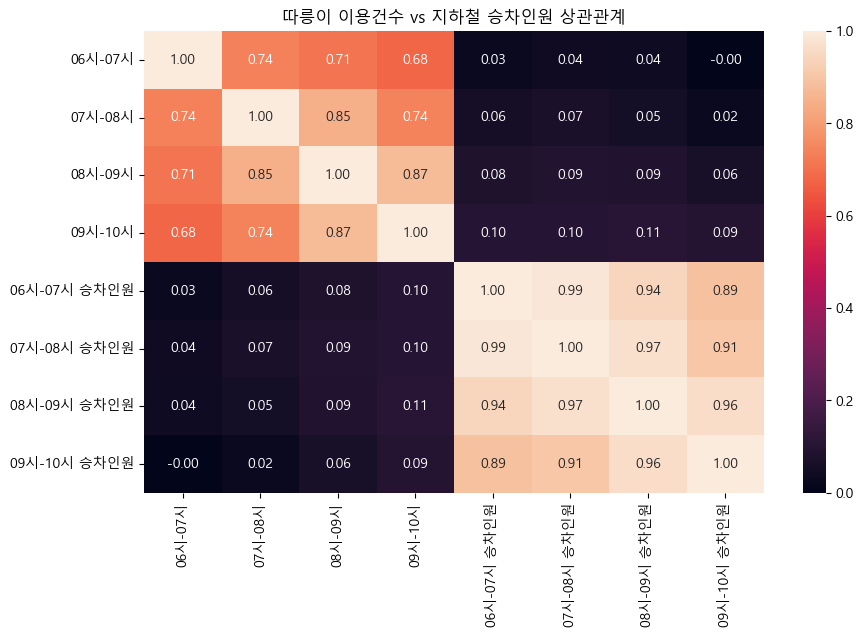

In [126]:
cols = ['06시-07시', '07시-08시', '08시-09시', '09시-10시',
        '06시-07시 승차인원', '07시-08시 승차인원', '08시-09시 승차인원', '09시-10시 승차인원']
corr = grouped4_df[cols].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, fmt=".2f")
plt.title("따릉이 이용건수 vs 지하철 승차인원 상관관계")
plt.savefig('heatmap.png')
#plt.show()


In [111]:
df=grouped4_df.copy()

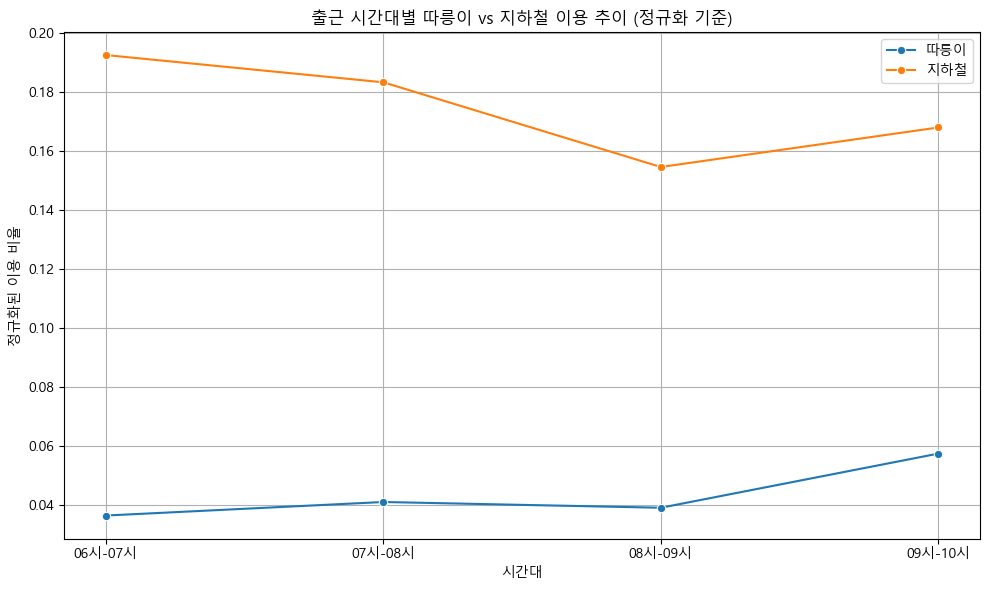

In [125]:

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
columns_bike = ['06시-07시', '07시-08시', '08시-09시', '09시-10시']
columns_subway = ['06시-07시 승차인원', '07시-08시 승차인원', '08시-09시 승차인원', '09시-10시 승차인원']

df_norm = df[columns_bike + columns_subway].copy()

#  Min-Max 정규화
scaler = MinMaxScaler()
df_norm_scaled = pd.DataFrame(scaler.fit_transform(df_norm), columns=df_norm.columns)


bike_norm_mean = df_norm_scaled[time_columns_bike].mean()
subway_norm_mean = df_norm_scaled[time_columns_subway].mean()


time_comparison_norm = pd.DataFrame({
    '시간대': ['06시-07시', '07시-08시', '08시-09시', '09시-10시'],
    '따릉이 (정규화)': bike_norm_mean.values,
    '지하철 (정규화)': subway_norm_mean.values
})

# 6. 선 그래프 시각화
plt.figure(figsize=(10, 6))
sns.lineplot(data=time_comparison_norm, x='시간대', y='따릉이 (정규화)', marker='o', label='따릉이')
sns.lineplot(data=time_comparison_norm, x='시간대', y='지하철 (정규화)', marker='o', label='지하철')
plt.title("출근 시간대별 따릉이 vs 지하철 이용 추이 (정규화 기준)")
plt.ylabel("정규화된 이용 비율")
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.savefig('nomalized.png')
#plt.show()
